In [1]:
#Question:1
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform, ttest_1samp, chi2
%matplotlib inline
df = pd.read_csv('NDAP_REPORT_7004.csv')
df_auto=pd.read_csv('Automobile_data.csv')

## Data Cleaning
Aim is to get the required portions of data which we have to analyse

In [2]:
cd=df.dropna() #To drop the rows with NaN values
cd

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,1331,22710.000000,3014.00000,3034.000000,480.000000,229.000000,76229.00000,1400.000000,768.000000
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,121,6807.000000,123.00000,268.000000,93.000000,98.000000,23789.00000,1894.000000,260.000000
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561.57321,134.1822704,168.9702664,7174.278724,960.14869,748.438886,306.134365,214.691633,73342.04111,1013.821599,1498.865657
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,27,935.000000,24.00000,187.000000,30.000000,39.000000,11297.00000,454.000000,94.000000
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312.4268,410.8177296,173.0297336,19207.721280,3227.85131,12552.561110,5479.865635,1740.308367,72686.95889,2118.178401,2715.134343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352,202,150,426.000000,95.00000,72.000000,185.000000,130.000000,39160.00000,1927.000000,5.000000
1469,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410,6,0,50.000000,2.00000,238.000000,5094.000000,0.000000,2.00000,5.000000,13.000000
1470,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279,11,1,6.000000,0.00000,165.000000,4820.000000,11.000000,147.00000,116.000000,2.000000
1471,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408,16428,62,4939.000000,145.00000,113.000000,74.000000,96.000000,12642.00000,897.000000,12.000000


In [3]:
cd["Number of census houses"]= cd["Number of census houses"].replace("zero",float(0))
cd["Houses having grass or thatch or bamboo etc. as material of wall"]= cd["Houses having grass or thatch or bamboo etc. as material of wall"].replace("zero",float(0))
cd["Houses having plastic or polythene as material of wall"]= cd["Houses having plastic or polythene as material of wall"].replace("zero",float(0))
#.astype() command was used to convert the type of columns from 'str' to 'float'
cd['Number of census houses'] = cd['Number of census houses'].astype('float64')
cd['Houses having grass or thatch or bamboo etc. as material of wall'] = cd['Houses having grass or thatch or bamboo etc. as material of wall'].astype('float64')
cd['Houses having plastic or polythene as material of wall']=cd['Houses having plastic or polythene as material of wall'].astype('float64')
cd.dtypes

C:\Users\alauk\AppData\Local\Temp\ipykernel_21940\558661737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd["Number of census houses"]= cd["Number of census houses"].replace("zero",float(0))
C:\Users\alauk\AppData\Local\Temp\ipykernel_21940\558661737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd["Houses having grass or thatch or bamboo etc. as material of wall"]= cd["Houses having grass or thatch or bamboo etc. as material of wall"].replace("zero",float(0))
C:\Users\alauk\AppData\Local\Temp\

Rowid                                                                                          int64
Country                                                                                       object
State lgd code                                                                                 int64
State                                                                                         object
District lgd code                                                                              int64
District                                                                                      object
Year                                                                                           int64
Type of residence namely rural or urban                                                       object
Number of census houses                                                                      float64
Houses having grass or thatch or bamboo etc. as material of wall                           

In [4]:
cd3=cd #creating a copy of existing dataframe
ch = 'J' #variable which will be used indexing new columns
for i in range(9,19):
    cd3['NewCol '+str(ch)]=cd3.iloc[:,i]/cd3['Number of census houses']*100 #adding new columns based on given conditions in question
    ch = chr(ord(ch) + 1) #incrementing the ch variable

C:\Users\alauk\AppData\Local\Temp\ipykernel_21940\235357094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd3['NewCol '+str(ch)]=cd3.iloc[:,i]/cd3['Number of census houses']*100 #adding new columns based on given conditions in question
C:\Users\alauk\AppData\Local\Temp\ipykernel_21940\235357094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd3['NewCol '+str(ch)]=cd3.iloc[:,i]/cd3['Number of census houses']*100 #adding new columns based on given conditions in question
C:\Users\alauk\AppData\Local

Dropping Unneccesary Columns and Renaming the modified ones

In [5]:
cd1=cd3.drop(cd3.columns[1:11], axis=1)
cd1=cd1.drop(cd1.columns[2:11], axis=1)
cd1=cd1.drop(cd1.columns[3:10], axis=1)
cd1.rename(columns = {'NewCol L':'% of Houses having mud or unburnt brick as material of wall'}, inplace = True)
cd1


,Rowid,Houses having mud or unburnt brick as material of wall,% of Houses having mud or unburnt brick as material of wall
0,1,22710.000000,20.746357
1,2,6807.000000,20.306068
2,3,7174.278724,8.384931
3,4,935.000000,7.117844
4,5,19207.721280,15.964869
...,...,...,...
1468,1469,426.000000,1.005856
1469,1470,50.000000,0.924214
1470,1471,6.000000,0.113658
1471,1472,4939.000000,13.948825


Finding and removing undefined values

In [6]:
a=cd1['% of Houses having mud or unburnt brick as material of wall'].to_numpy()
c=np.sort(a)
b=np.isnan(c) #To check for 'NaN Values'
print(b)
count=0
for i in range(len(a)):
    if b[i]=='True':
        count=count+1;
print(count)

[False False False ...  True  True  True]
0


In [7]:
cd2=cd1.sort_values(by='% of Houses having mud or unburnt brick as material of wall',ascending=True).reset_index()
cd2=cd2.dropna()
cd2.isnull().sum()


index                                                          0
Rowid                                                          0
Houses having mud or unburnt brick as material of wall         0
% of Houses having mud or unburnt brick as material of wall    0
dtype: int64

In [8]:
cd2

,index,Rowid,Houses having mud or unburnt brick as material of wall,% of Houses having mud or unburnt brick as material of wall
0,536,537,0.0000,0.000000
1,1393,1394,3.0000,0.030124
2,622,623,2.0000,0.063371
3,623,624,4.0000,0.063442
4,557,618,15.0000,0.078786
...,...,...,...,...
1433,782,912,100704.0000,93.744415
1434,907,904,167506.0000,95.713339
1435,921,922,155579.4393,96.460821
1436,939,940,154311.6153,96.460821


In [9]:
a=cd2['% of Houses having mud or unburnt brick as material of wall'].to_numpy()
def dmean(num_arr): #Function to calculate mean of an array
    n=len(num_arr)
    mean=(num_arr.sum())/n
    return mean
def stddev(num_arr,mean): #Function to calculate standard deviation of an array
    sqsum=0
    for i in range(len(num_arr)):
        sqsum=sqsum+(num_arr[i]-mean)*(num_arr[i]-mean)
    var=sqsum/len(num_arr)
    stddev=math.sqrt(var)
    return stddev
c=a #Creating duplicate copies of 'a' such that any changes in duplicate array does not affect 'a'
c = np.copy(a)
c[:] = a[:]
d=a
d=np.copy(a)
d[:]=a[:]

a1=dmean(a)
a2=stddev(a,a1)

for i in range(len(a)):
    c[i]=(a[i]-a1)/a2
    
    #Array 'c' is z-normalised value derived from data


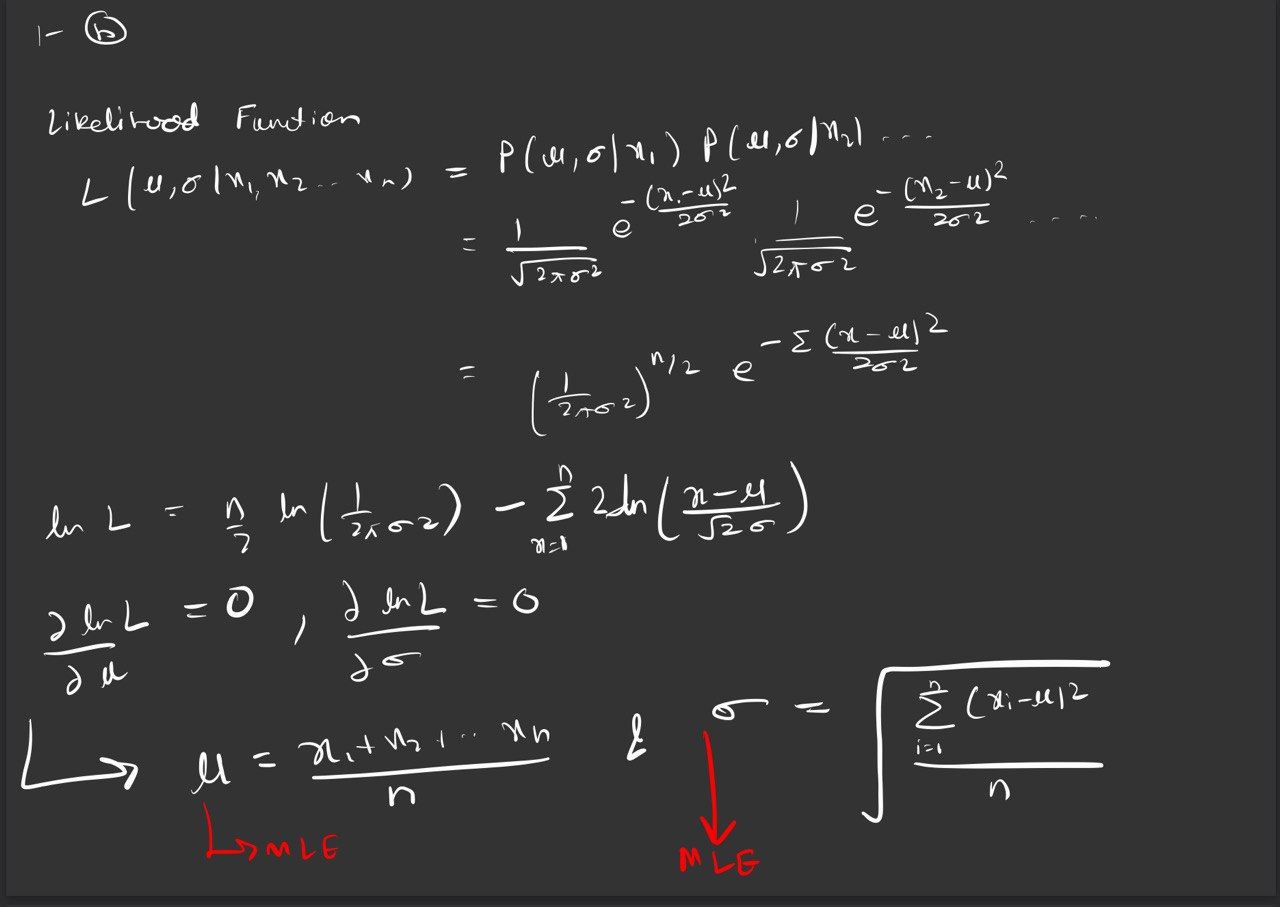

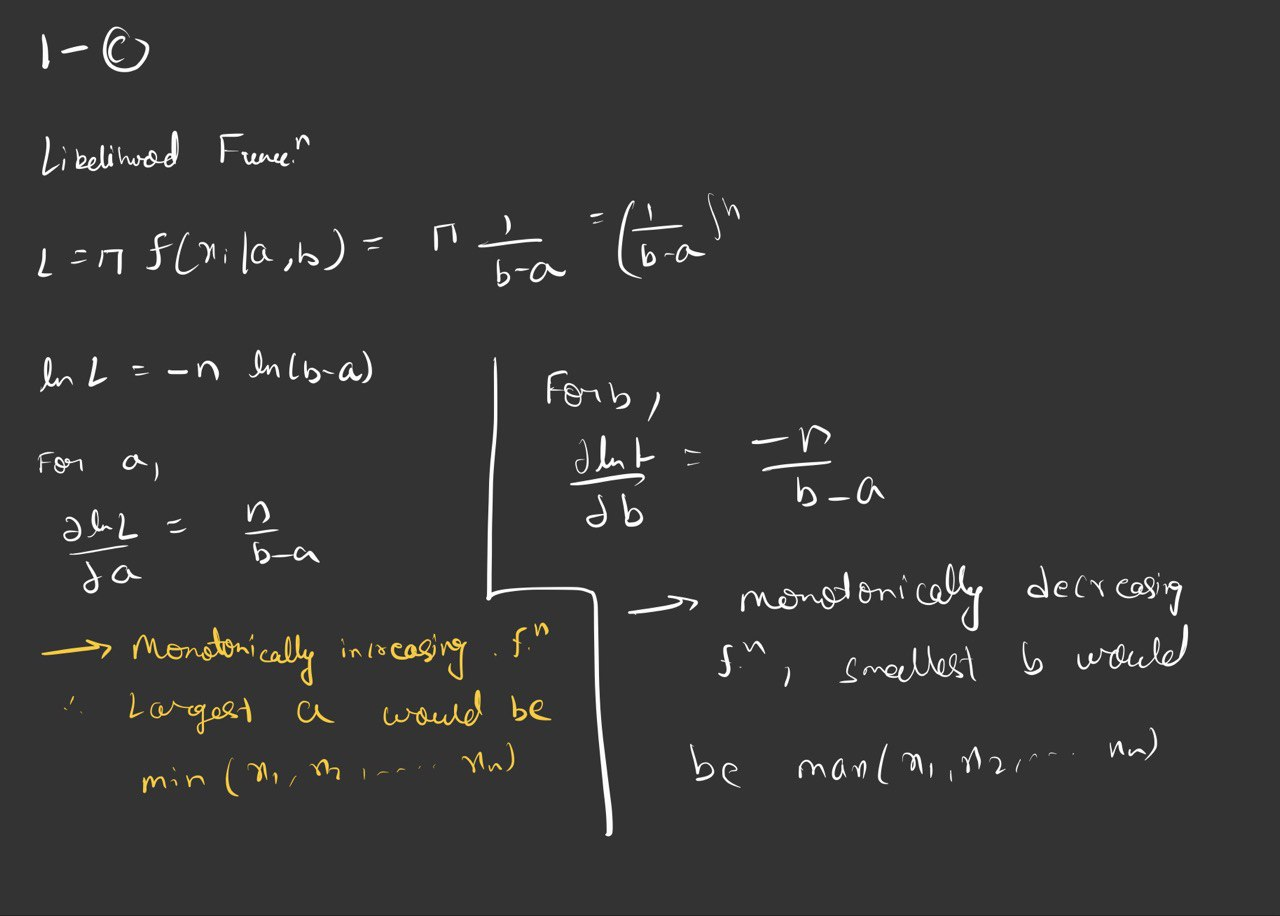

# Q-Q Plots 

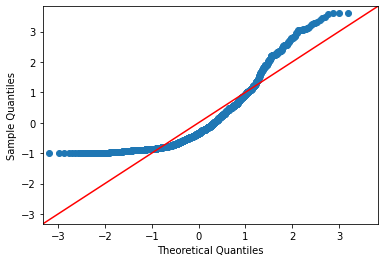

In [10]:
# Q-Q plots with percentiles of data(unchanged) on y-axis
# compared with percentiles from normal distribution
qqplot(d,norm,fit=True,line="45")
plt.show()

From this graph we observe that there are some variations but the line is quite close to a straight line

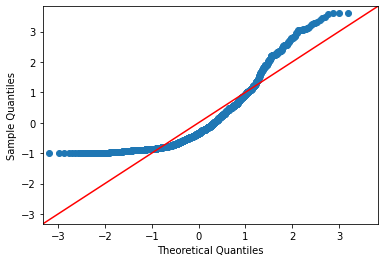

In [11]:
# Q-Q plots with percentiles of data(z-normalized) on y-axis
# compared with percentiles from normal distribution
qqplot(c,norm,fit=True,line="45")
plt.show()

There is not significant difference in using either unchanged values or z-normalized ones

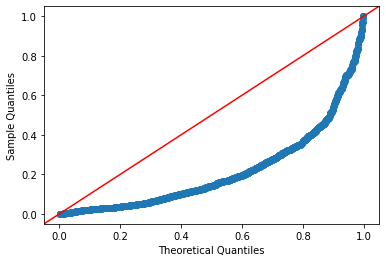

In [12]:
# Q-Q plots with percentiles of data(z-normalized) on y-axis
# compared with percentiles from uniform distribution
qqplot(c,uniform,fit=True,line="45")
plt.show()

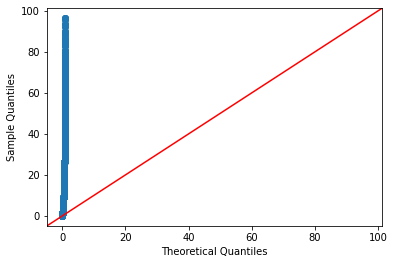

In [13]:
# Q-Q plots with percentiles of data(unchanged) on y-axis
# compared with percentiles from uniform distribution
qqplot(d,uniform,fit=True,line="45")
plt.show()

From both the graphs we find that the sample quantiles deviate significantly from those in uniform distribution
We can conclude that our data represents Normal distribution much more closely than uniform

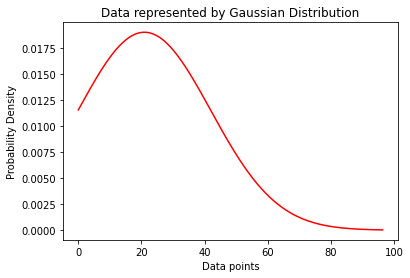

In [14]:
#MLE parameter estimate for Normal Distribution
''' #Function to return pdf values corresponding to mean 
    and standard deviation from a normal distribution'''
def normal_dist(x, mean , sd):
    k1=math.sqrt(2*(np.pi)*sd*sd)
    k2=1/k1
    prob_density = k2* np.exp(-0.5*(((x-mean)/sd)**2))
    return prob_density
mean=dmean(a)
standev=stddev(a,mean)
pdf=normal_dist(a,mean,standev)
plt.plot(a,pdf,color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title("Data represented by Gaussian Distribution")
plt.show()

        
    
    

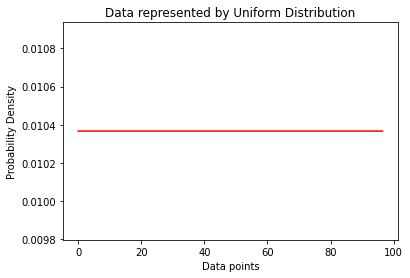

In [15]:
#MLE parameter estimate for uniform distribution
def uniform_dist(x): #Function to return probability corresponding to uniform distribution
    maxv=np.max(x)
    minv=np.min(x)
    val=(1/(maxv-minv))
    prob_density =np.zeros(1438)
    prob_density.fill(val)
    return prob_density
   
pdf=uniform_dist(a)
plt.plot(a,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title("Data represented by Uniform Distribution")
plt.show()




In [16]:
e=np.zeros(100) # Array with 100 elements all zero, to store percentiles in it
for i in range(0,100):
    e[i]=(np.percentile(a,i))
g= np.random.normal(0, 1, 100) #Array with random 100 elements from a normal distribution with mean 0 and standard deviation

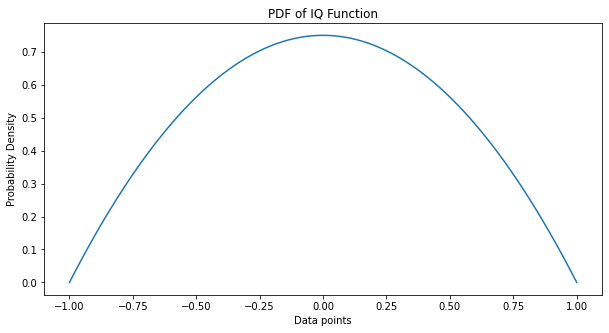

In [17]:
z = np.linspace(-1, 1, 100) #Array with equally spaced 100 number from(-1,1)
w = (0.75)*(1-z**2) #IQ function (given earlier)
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(z, w)
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title("PDF of IQ Function")
# Show the plot
plt.show()

0.9998979695949395


<function matplotlib.pyplot.show(close=None, block=None)>

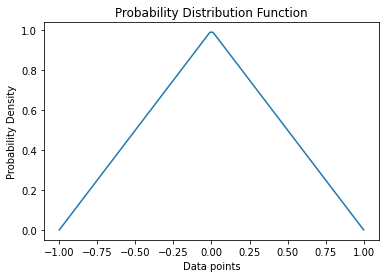

In [18]:
x=np.linspace(-1,1,100)#Array with equally spaced 100 number from(-1,1) for new function
y=np.linspace(-1,1,100)#Array with equally spaced 100 number from(-1,1), for storing pdf values of x
cdf=np.zeros(100) #zero array of 100 length to store cdf 
area=0 # Variable to store area of small rectangle(For Integration)
for i in range(0,100):
    if x[i]>0 and x[i]<1: #Function is 1-x for x>=0
        y[i]=1-x[i]
    elif x[i]<0 and x[i]>-1: #Function is 1+x for x<0
        y[i]=1+x[i]
    elif x[i]==0:
        y[i]=1
    else:  #Function is zero(otherwise)
        y[i]=0
    area=area+y[i]*(2/99) # 2/99 is the width of each small rectangle as there are 100 points divided equally between (-1,1)
    cdf[i]=area

print(area)
plt.plot(x,y)
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title("Probability Distribution Function")
plt.show




Text(0.5, 1.0, 'Cumulative Density Function')

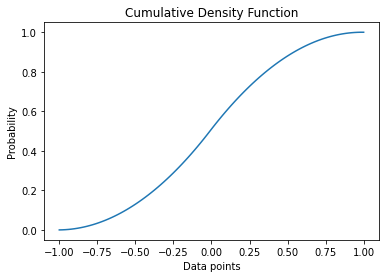

In [19]:
plt.plot(x,cdf)
plt.xlabel('Data points')
plt.ylabel('Probability')
plt.title("Cumulative Density Function")

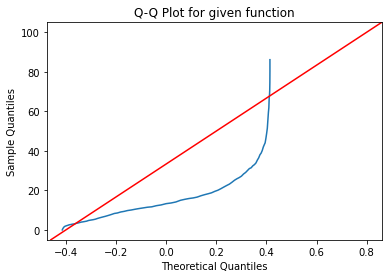

In [20]:
#Function to calculate inverse of cdf, to find percentile of theoretical samples from given distribution
# Percentile is inverse of cdf
#Percentile is calculated analytically
def invcdf(cdf):
    invcdfar=np.zeros(len(cdf))
    for i in range(0,len(cdf)):
        if cdf[i]>0.5:
            invcdfar[i]=(-1+ math.sqrt(2*(cdf[i])))
        else:
            invcdfar[i]=(1-math.sqrt(2-2*(cdf[i])))
    return invcdfar
array2=invcdf(cdf)
plt.plot(array2,e)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title("Q-Q Plot for given function")
plt.axline([-0.4, 0], [0.8, 100], color='red') #To get a straight line if the distribution was satisfying the dataset



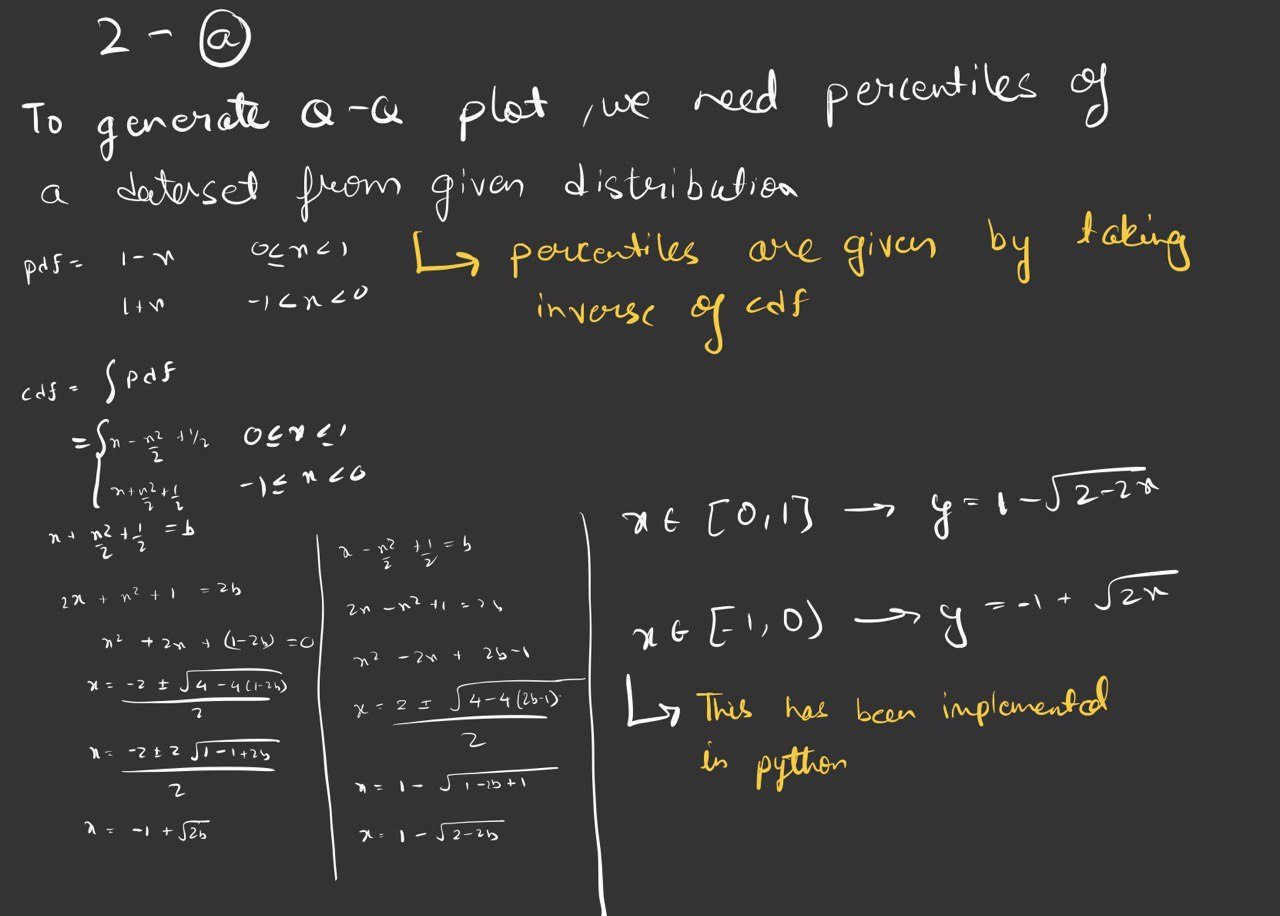

Enter 1 for Scaling or 0 for Shifting
1
Enter Shifting or Scaling Factor
3


Text(0.5, 1.0, 'Probability Distribution Function')

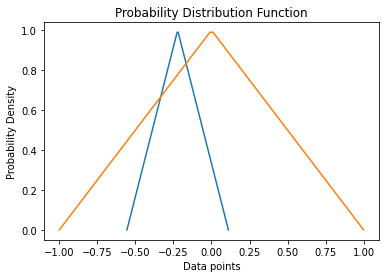

In [21]:
#Scaling & Shifting
'''Function to scale or shift the graph based on parameters a,b
pdf=(1-a(x-b))
Here, the parameters are user input
and parameters a and b are not independent as the area under graph should be 1 so there is a relation
between a and b, i.e, a(2b-1)=1
 '''
def scale_shift(x,x_new,dec,fac):
    if dec==1: 
        scale=fac
        for i in range(0,len(x)): 
            nshift=(1/scale+1)*(0.5)
            x_new[i]=x[i]-nshift
            x_new[i]=x_new[i]/scale
        return x_new
    elif dec==0:
        shift=fac
        for i in range(0,len(x)): 
            nscale=(1/(2*shift-1))
            x_new[i]=x[i]-shift
            x_new[i]=x_new[i]/nscale
        return x_new
    
print("Enter 1 for Scaling or 0 for Shifting")
dec=int(input())
print("Enter Shifting or Scaling Factor")
fac=int(input())
x_new2 = np.copy(x)
x_new2[:] = x[:]
scale_shift(x,x_new2,dec,fac)
plt.plot(x_new2,y)
plt.plot(x,y)

plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title("Probability Distribution Function")

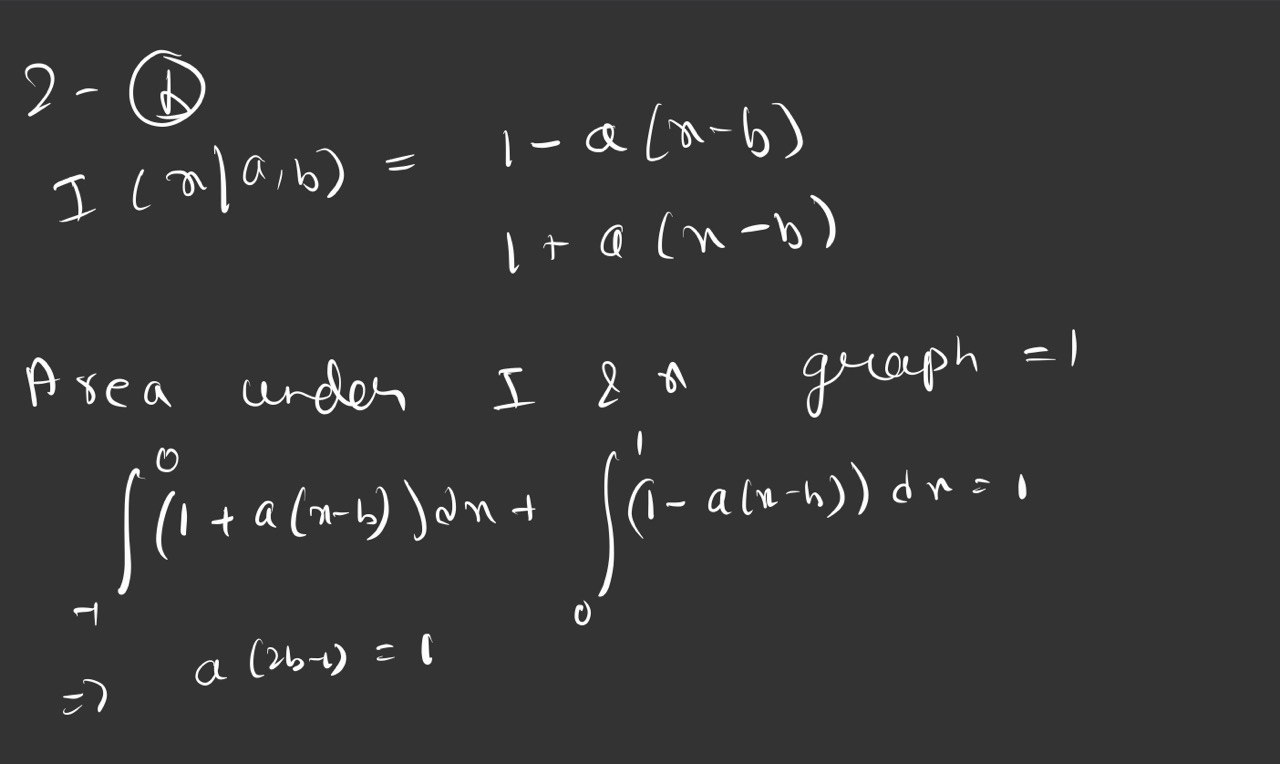

Text(0.5, 1.0, 'Probability Distribution Function')

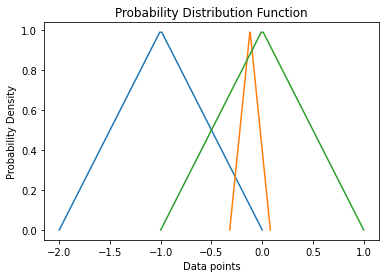

In [22]:
#A sample shifted/scaled graphs based on fixed parameters
x2 = np.copy(x)
x2[:] = x[:]
x3 = np.copy(x)
x3[:] = x[:]
scale_shift(x,x3,0,0.6)
scale_shift(x,x2,1,1)
plt.plot(x2,y)
plt.plot(x3,y)
plt.plot(x,y)
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title("Probability Distribution Function")

In [23]:
cdt1=cd3.drop(cd3.columns[0:7], axis=1) #Dropping uneccessary columns
cdt1=cdt1.drop(cdt1.columns[1:14],axis=1)
cdt1=cdt1.drop(cdt1.columns[2:11],axis=1)
#Renaming Column name for better readability
cdt1.rename(columns = {'NewCol L':'% of Houses having mud or unburnt brick as material of wall'}, inplace = True)
cdt1=cdt1.dropna() #Dropping data points with 'NaN' Values

house_rural = (cdt1[cdt1['Type of residence namely rural or urban']=='Rural']) #Columns containing only rural values
house_urban = cdt1[cdt1['Type of residence namely rural or urban']=='Urban']# Columns Containing only urban values
#Keeping only numerical columns
house_rural=house_rural.drop(house_rural.columns[0:1],axis=1)
house_urban=house_urban.drop(house_urban.columns[0:1],axis=1)
#Converting column data points in an numpy array
house_urban_npa=(house_urban).to_numpy()
house_rural_npa=(house_rural).to_numpy()
#Dataframe consisting Of Rural And Urban Values separately
cdtR=cdt1[cdt1['Type of residence namely rural or urban']=='Rural']
cdtU=cdt1[cdt1['Type of residence namely rural or urban']=='Urban']
Rural=cdtR['% of Houses having mud or unburnt brick as material of wall']
Urban=cdtU['% of Houses having mud or unburnt brick as material of wall']

#### Running a one tailed two sampled T-Test
As per the question we have to check whether the percent of mud/unburnt brick houses in rural is larger than in urban
We have two continuous variables and have direction associated in which we have to check so I am using a One tailed two sampled T-test

H0(Null Hypothesis)= There is no difference in percent of mud/unburnt brick houses in rural or urban

H1(Alternate Hypothesis)=Percent of mud/unburnt brick houses in rural is larger than in urban

In [24]:
_,p_value=stats.ttest_ind(a=Rural,b=Urban,equal_var=False,alternative='greater')

In [25]:
p_value

6.986818169096519e-45

In [26]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


There is indeed a difference in percent of mud/unburnt brick houses in rural and urban and it is higher in rural areas

#### To check whether we can predict the urban data from rural or vice- versa
Here we are using Pearson Correlation, as higher correlation shows that the two variables are related strongly and sign shows the direction
if pearson corr: +ve and close to 1 : Two variables are strongly related and increase in one causes increase in another

-ve & close to -1 :Two variables are strongly related and increase in one causes decrease in another

-ve & close to 0:Two variables are weakly related and increase in one causes decrease in another
+ve &close to 0 :Two variables are weakly related and increase in one causes increase in another

In [27]:
zipped = list(zip(Rural,Urban))         #using a zip function to combine both rural and urban values and making a new dataframe from it
cdrvsu = pd.DataFrame(zipped, columns=['Rural','Urban'])
cdrvsu.corr('pearson')

,Rural,Urban
Rural,1.000000,0.341851
Urban,0.341851,1.000000


As Correlation is small and positive, it indicates that the two varibles are not strongly related and we cannot
predict the movement of other based on movement of one

In [28]:
df_auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


### Comparing Two Categorical Variables:
Here we are using Chi-Square Test as it is generally used for comparing categorical values

In [29]:
df_compare=pd.crosstab(df_auto['body-style'],df_auto['drive-wheels'])
#crosstab:
#Compute a simple cross tabulation of two (or more) factor,computes a frequency table of the factors 
obs_val=df_compare.values #The values of the DataFrame in a tuple
obs_val


array([[ 0,  1,  5],
       [ 0,  1,  7],
       [ 2, 49, 19],
       [ 3, 57, 36],
       [ 4, 12,  9]], dtype=int64)

In [30]:
df_compare

drive-wheels,4wd,fwd,rwd
body-style,,,
convertible,0,1,5
hardtop,0,1,7
hatchback,2,49,19
sedan,3,57,36
wagon,4,12,9


In [31]:
'''This function computes the chi-square statistic and p-value for
the hypothesis test of independence of the observed frequencies in 
the contingency table observed.
'''
val=stats.chi2_contingency(df_compare)
val

(26.59036353905597,
 0.0008317943771481919,
 8,
 array([[ 0.26341463,  3.51219512,  2.22439024],
        [ 0.35121951,  4.68292683,  2.96585366],
        [ 3.07317073, 40.97560976, 25.95121951],
        [ 4.21463415, 56.19512195, 35.5902439 ],
        [ 1.09756098, 14.63414634,  9.26829268]]))

In [32]:
#Storing the expected values
exp_val=val[3]
exp_val

array([[ 0.26341463,  3.51219512,  2.22439024],
       [ 0.35121951,  4.68292683,  2.96585366],
       [ 3.07317073, 40.97560976, 25.95121951],
       [ 4.21463415, 56.19512195, 35.5902439 ],
       [ 1.09756098, 14.63414634,  9.26829268]])

In [33]:
n_row=len(df_compare.iloc[0:5,0]) #Computing no. of rows
n_col=len(df_compare.iloc[0,0:3]) #Computing no. of columns
dof=(n_row-1)*(n_col-1) #Computing Degree of Freedom
alpha=0.05 #Significance value


In [34]:
chi_sq=sum([(o-e)**2/e for o,e in zip(obs_val,exp_val)]) # Calculating Chi-Square Sum Array
chi_sq_stat=chi_sq[0]+chi_sq[1] #Chi-Square Statistic
chi_sq_stat

15.765285218253966

In [35]:
critical_val=chi2.ppf(q=1-alpha,df=dof) #Computing critical value from Probability Point Function
print(critical_val)

15.50731305586545


In [36]:
p_value=1-chi2.cdf(x=chi_sq_stat,df=dof) #Computing P value
print('p_value :',p_value)
print('Significance Value :', alpha)
print('Degree Of Freedom :', dof)


p_value : 0.045865491763983246
Significance Value : 0.05
Degree Of Freedom : 8


In [37]:
if chi_sq_stat>=critical_val:
    print("There is a relationship between body-style & drive-wheels")
else:
    print("There is NO relationship between body-style & drive-wheels")

There is a relationship between body-style & drive-wheels


References:
   1. https://www.youtube.com/watch?v=Ky7QeVgv-BA&t=325
    
   2. https://www.youtube.com/watch?v=4Fta6KQ1QHQ&ab_channel=KrishNaik
    
   3. https://www.statisticshowto.com/q-q-plots/
    
   4. https://nathancarter.github.io/how2data/site/how-to-create-a-qq-plot/
    
   5. https://stackoverflow.com/questions/35978165/a-numpy-array-unexpectedly-changes-when-changing-another-one-despite-being-separ
    
   6. https://stats.stackexchange.com/questions/427749/qq-plot-comparison-of-z-normalized-datasets
    
   7. https://stackoverflow.com/questions/55724501/generate-a-random-number-according-to-a-specific-distribution-with-a-function
    
   8. https://online.stat.psu.edu/stat414/lesson/14/14.3
     